In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.DataFrame({'cgpa':[6.82,6.36,5.39,5.50,6.39,9.13,7.17,7.72],'iq':[118,125,99,106,148,148,147,72],'is_placed':[0,1,1,1,0,1,1,0]})

In [3]:
df

,cgpa,iq,is_placed
0,6.82,118,0
1,6.36,125,1
2,5.39,99,1
3,5.50,106,1
4,6.39,148,0
5,9.13,148,1
6,7.17,147,1
7,7.72,72,0


In [4]:
log_odds=np.log(len(df[df['is_placed']==1])/len(df[df['is_placed']==0]))

In [5]:
log_odds

0.5108256237659907

In [6]:
df['log_odds_1']=log_odds

In [7]:
df

,cgpa,iq,is_placed,log_odds_1
0,6.82,118,0,0.510826
1,6.36,125,1,0.510826
2,5.39,99,1,0.510826
3,5.50,106,1,0.510826
4,6.39,148,0,0.510826
5,9.13,148,1,0.510826
6,7.17,147,1,0.510826
7,7.72,72,0,0.510826


In [8]:
df['prob_1']=1/(1+np.exp(-df['log_odds_1']))

In [9]:
df

,cgpa,iq,is_placed,log_odds_1,prob_1
0,6.82,118,0,0.510826,0.625
1,6.36,125,1,0.510826,0.625
2,5.39,99,1,0.510826,0.625
3,5.50,106,1,0.510826,0.625
4,6.39,148,0,0.510826,0.625
5,9.13,148,1,0.510826,0.625
6,7.17,147,1,0.510826,0.625
7,7.72,72,0,0.510826,0.625


In [10]:
df['res_1']=df['prob_1']-df['is_placed']

In [11]:
df

,cgpa,iq,is_placed,log_odds_1,prob_1,res_1
0,6.82,118,0,0.510826,0.625,0.625
1,6.36,125,1,0.510826,0.625,-0.375
2,5.39,99,1,0.510826,0.625,-0.375
3,5.50,106,1,0.510826,0.625,-0.375
4,6.39,148,0,0.510826,0.625,0.625
5,9.13,148,1,0.510826,0.625,-0.375
6,7.17,147,1,0.510826,0.625,-0.375
7,7.72,72,0,0.510826,0.625,0.625


In [12]:
from sklearn.tree import plot_tree,DecisionTreeRegressor

In [13]:
dt=DecisionTreeRegressor(max_leaf_nodes=3)

In [14]:
dt.fit(df.iloc[:,[0,1]],df['res_1'])

DecisionTreeRegressor(max_leaf_nodes=3)

[Text(0.4, 0.8333333333333334, 'node #0\ncgpa <= 6.375\nsquared_error = 0.234\nsamples = 8\nvalue = 0.0'),
 Text(0.2, 0.5, 'node #1\nsquared_error = 0.0\nsamples = 3\nvalue = -0.375'),
 Text(0.6, 0.5, 'node #2\niq <= 132.5\nsquared_error = 0.24\nsamples = 5\nvalue = 0.225'),
 Text(0.4, 0.16666666666666666, 'node #3\nsquared_error = 0.0\nsamples = 2\nvalue = 0.625'),
 Text(0.8, 0.16666666666666666, 'node #4\nsquared_error = 0.222\nsamples = 3\nvalue = -0.042')]

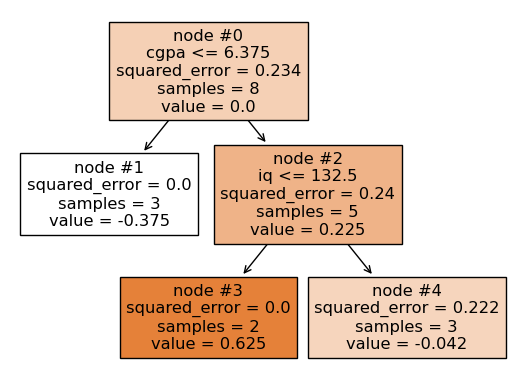

In [15]:
plot_tree(dt,feature_names=['cgpa','iq'],filled=True,node_ids=True)

In [16]:
df['leaf']=dt.apply(df.iloc[:,[0,1]])

In [17]:
df

,cgpa,iq,is_placed,log_odds_1,prob_1,res_1,leaf
0,6.82,118,0,0.510826,0.625,0.625,3
1,6.36,125,1,0.510826,0.625,-0.375,1
2,5.39,99,1,0.510826,0.625,-0.375,1
3,5.50,106,1,0.510826,0.625,-0.375,1
4,6.39,148,0,0.510826,0.625,0.625,4
5,9.13,148,1,0.510826,0.625,-0.375,4
6,7.17,147,1,0.510826,0.625,-0.375,4
7,7.72,72,0,0.510826,0.625,0.625,3


In [18]:
def calc_logs(leaf):
    new_df=df[df['leaf']==leaf]
    res=np.sum(new_df['res_1'])
    prob=sum(new_df['prob_1']*(1-new_df['prob_1']))
    return round(res/prob)

In [19]:
df['log_odds_2']=df['leaf'].apply(calc_logs)+df['log_odds_1']

In [20]:
df

,cgpa,iq,is_placed,log_odds_1,prob_1,res_1,leaf,log_odds_2
0,6.82,118,0,0.510826,0.625,0.625,3,3.510826
1,6.36,125,1,0.510826,0.625,-0.375,1,-1.489174
2,5.39,99,1,0.510826,0.625,-0.375,1,-1.489174
3,5.50,106,1,0.510826,0.625,-0.375,1,-1.489174
4,6.39,148,0,0.510826,0.625,0.625,4,0.510826
5,9.13,148,1,0.510826,0.625,-0.375,4,0.510826
6,7.17,147,1,0.510826,0.625,-0.375,4,0.510826
7,7.72,72,0,0.510826,0.625,0.625,3,3.510826


In [21]:
df['prob_2']=1/(1+np.exp(-df['log_odds_2']))

In [22]:
df

,cgpa,iq,is_placed,log_odds_1,prob_1,res_1,leaf,log_odds_2,prob_2
0,6.82,118,0,0.510826,0.625,0.625,3,3.510826,0.970994
1,6.36,125,1,0.510826,0.625,-0.375,1,-1.489174,0.184046
2,5.39,99,1,0.510826,0.625,-0.375,1,-1.489174,0.184046
3,5.50,106,1,0.510826,0.625,-0.375,1,-1.489174,0.184046
4,6.39,148,0,0.510826,0.625,0.625,4,0.510826,0.625000
5,9.13,148,1,0.510826,0.625,-0.375,4,0.510826,0.625000
6,7.17,147,1,0.510826,0.625,-0.375,4,0.510826,0.625000
7,7.72,72,0,0.510826,0.625,0.625,3,3.510826,0.970994


In [24]:
dt2=DecisionTreeRegressor(max_leaf_nodes=3)

[Text(0.4, 0.8333333333333334, 'node #0\nx[0] <= 6.375\nsquared_error = 0.097\nsamples = 8\nvalue = 0.546'),
 Text(0.2, 0.5, 'node #1\nsquared_error = -0.0\nsamples = 3\nvalue = 0.184'),
 Text(0.6, 0.5, 'node #2\nx[1] <= 132.5\nsquared_error = 0.029\nsamples = 5\nvalue = 0.763'),
 Text(0.4, 0.16666666666666666, 'node #3\nsquared_error = 0.0\nsamples = 2\nvalue = 0.971'),
 Text(0.8, 0.16666666666666666, 'node #4\nsquared_error = -0.0\nsamples = 3\nvalue = 0.625')]

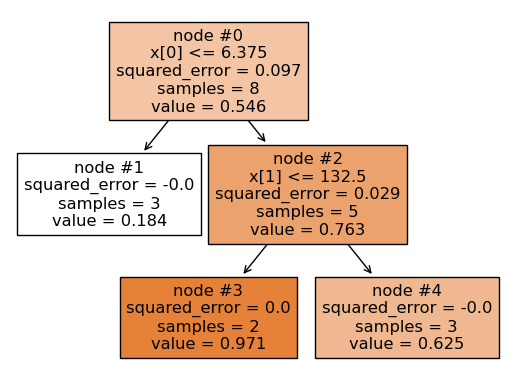

In [28]:
df['res_2']=df['is_placed']-df['prob_2']
dt2.fit(df.iloc[:,[0,1]],df['prob_2'])
plot_tree(dt2,node_ids=True,filled=True)

In [31]:
df['leaf_2']=dt2.apply(df.iloc[:,[0,1]])

In [32]:
df

,cgpa,iq,is_placed,log_odds_1,prob_1,res_1,leaf,log_odds_2,prob_2,res_2,leaf_2
0,6.82,118,0,0.510826,0.625,0.625,3,3.510826,0.970994,-0.970994,3
1,6.36,125,1,0.510826,0.625,-0.375,1,-1.489174,0.184046,0.815954,1
2,5.39,99,1,0.510826,0.625,-0.375,1,-1.489174,0.184046,0.815954,1
3,5.50,106,1,0.510826,0.625,-0.375,1,-1.489174,0.184046,0.815954,1
4,6.39,148,0,0.510826,0.625,0.625,4,0.510826,0.625000,-0.625000,4
5,9.13,148,1,0.510826,0.625,-0.375,4,0.510826,0.625000,0.375000,4
6,7.17,147,1,0.510826,0.625,-0.375,4,0.510826,0.625000,0.375000,4
7,7.72,72,0,0.510826,0.625,0.625,3,3.510826,0.970994,-0.970994,3


In [33]:
df['log_odds_3']=df['leaf_2'].apply(calc_logs)+df['log_odds_1']+df['log_odds_2']

In [34]:
df

,cgpa,iq,is_placed,log_odds_1,prob_1,res_1,leaf,log_odds_2,prob_2,res_2,leaf_2,log_odds_3
0,6.82,118,0,0.510826,0.625,0.625,3,3.510826,0.970994,-0.970994,3,7.021651
1,6.36,125,1,0.510826,0.625,-0.375,1,-1.489174,0.184046,0.815954,1,-2.978349
2,5.39,99,1,0.510826,0.625,-0.375,1,-1.489174,0.184046,0.815954,1,-2.978349
3,5.50,106,1,0.510826,0.625,-0.375,1,-1.489174,0.184046,0.815954,1,-2.978349
4,6.39,148,0,0.510826,0.625,0.625,4,0.510826,0.625000,-0.625000,4,1.021651
5,9.13,148,1,0.510826,0.625,-0.375,4,0.510826,0.625000,0.375000,4,1.021651
6,7.17,147,1,0.510826,0.625,-0.375,4,0.510826,0.625000,0.375000,4,1.021651
7,7.72,72,0,0.510826,0.625,0.625,3,3.510826,0.970994,-0.970994,3,7.021651


In [35]:
df['prob_3']=1/(1+np.exp(-df['log_odds_3']))

In [36]:
df

,cgpa,iq,is_placed,log_odds_1,prob_1,res_1,leaf,log_odds_2,prob_2,res_2,leaf_2,log_odds_3,prob_3
0,6.82,118,0,0.510826,0.625,0.625,3,3.510826,0.970994,-0.970994,3,7.021651,0.999108
1,6.36,125,1,0.510826,0.625,-0.375,1,-1.489174,0.184046,0.815954,1,-2.978349,0.048414
2,5.39,99,1,0.510826,0.625,-0.375,1,-1.489174,0.184046,0.815954,1,-2.978349,0.048414
3,5.50,106,1,0.510826,0.625,-0.375,1,-1.489174,0.184046,0.815954,1,-2.978349,0.048414
4,6.39,148,0,0.510826,0.625,0.625,4,0.510826,0.625000,-0.625000,4,1.021651,0.735294
5,9.13,148,1,0.510826,0.625,-0.375,4,0.510826,0.625000,0.375000,4,1.021651,0.735294
6,7.17,147,1,0.510826,0.625,-0.375,4,0.510826,0.625000,0.375000,4,1.021651,0.735294
7,7.72,72,0,0.510826,0.625,0.625,3,3.510826,0.970994,-0.970994,3,7.021651,0.999108


In [37]:
df['res_final']=df['is_placed']-df['prob_3']

In [41]:
r=df[['res_1','res_2','res_final']]

In [42]:
r['s']=df['res_1']+df['res_2']+df['res_final']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14576\3583739467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r['s']=df['res_1']+df['res_2']+df['res_final']


In [43]:
r

,res_1,res_2,res_final,s
0,0.625,-0.970994,-0.999108,-1.345103
1,-0.375,0.815954,0.951586,1.392541
2,-0.375,0.815954,0.951586,1.392541
3,-0.375,0.815954,0.951586,1.392541
4,0.625,-0.625000,-0.735294,-0.735294
5,-0.375,0.375000,0.264706,0.264706
6,-0.375,0.375000,0.264706,0.264706
7,0.625,-0.970994,-0.999108,-1.345103


In [44]:
def si(x):
    if x>0.5:
        return 1
    else:
        return 0

In [45]:
r['class']=r['s'].apply(si)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14576\582636674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r['class']=r['s'].apply(si)


In [46]:
r

,res_1,res_2,res_final,s,class
0,0.625,-0.970994,-0.999108,-1.345103,0
1,-0.375,0.815954,0.951586,1.392541,1
2,-0.375,0.815954,0.951586,1.392541,1
3,-0.375,0.815954,0.951586,1.392541,1
4,0.625,-0.625000,-0.735294,-0.735294,0
5,-0.375,0.375000,0.264706,0.264706,0
6,-0.375,0.375000,0.264706,0.264706,0
7,0.625,-0.970994,-0.999108,-1.345103,0


In [47]:
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
g=GradientBoostingClassifier(n_estimators=3,max_leaf_nodes=3)

In [50]:
g.fit(df.iloc[:,[0,1]],df.iloc[:,[2]])

G:\anaconda\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(max_leaf_nodes=3, n_estimators=3)

In [51]:
g.feature_importances_

array([0.82961306, 0.17038694])